Ön hazırlık (kütüphane kurulumu)

Ön hazırlık (kütüphane kurulumu)

In [3]:
# Gerekli kütüphaneleri yükleyelim (Colab hücresine)
!pip install cirq qiskit qutip numpy matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 60.5 MB/s eta 0:00:00


1) Cirq ile Örnekler

Çıkarma: z1 - z2 = (2+6j)
Bölme: z1 / z2 = (-1+2j)
Eşlenik: z1 = (3+4j)  -> z̅1 = (3-4j)
|z1|^2 = 25.0  = z1 * z̅1 = (25+0j)
(3+4j) sayısının 3. kuvveti = (-117+44.000000000000036j)
(3+4j) sayısının 3. dereceden kökleri: [np.complex128(1.6289371459221758+0.5201745023045458j), np.complex128(-1.2649529063577516+1.1506136983844504j), np.complex128(-0.36398423956442444-1.6707882006889963j)]


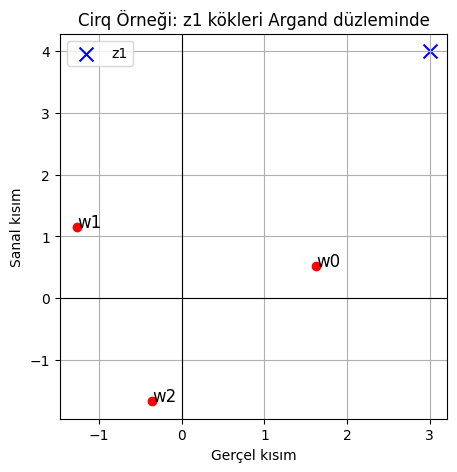

In [4]:
import cirq
import numpy as np
import cmath
import matplotlib.pyplot as plt


# Örnek kompleks sayılar
z1 = 3 + 4j
z2 = 1 - 2j

# --- Çıkarma ---
z_sub = z1 - z2
print("Çıkarma: z1 - z2 =", z_sub)

# --- Bölme ---
z_div = z1 / z2
print("Bölme: z1 / z2 =", z_div)

# --- Eşlenik ---
z_conj = np.conjugate(z1)
print("Eşlenik: z1 =", z1, " -> z̅1 =", z_conj)
print("|z1|^2 =", abs(z1)**2, " = z1 * z̅1 =", z1*z_conj)

# --- Kuvvet (de Moivre) ---
r = abs(z1)
theta = cmath.phase(z1)
n = 3
z_pow = r**n * (np.cos(n*theta) + 1j*np.sin(n*theta))
print(f"{z1} sayısının {n}. kuvveti =", z_pow)

# --- Kök Alma ---
n = 3
roots = []
for k in range(n):
    root = r**(1/n) * (np.cos((theta+2*k*np.pi)/n) + 1j*np.sin((theta+2*k*np.pi)/n))
    roots.append(root)
print(f"{z1} sayısının {n}. dereceden kökleri:", roots)

# Görselleştirme - kökler Argand düzleminde
plt.figure(figsize=(5,5))
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.scatter([z.real for z in roots], [z.imag for z in roots], color="red")
plt.scatter([z1.real], [z1.imag], color="blue", marker="x", s=100, label="z1")
for i, root in enumerate(roots):
    plt.text(root.real, root.imag, f"w{i}", fontsize=12)
plt.title("Cirq Örneği: z1 kökleri Argand düzleminde")
plt.xlabel("Gerçel kısım")
plt.ylabel("Sanal kısım")
plt.grid(True)
plt.legend()
plt.show()


2) QuTiP ile Örnekler

Çıkarma (z1 - z2): (3-1j)
Bölme (z1 / z2): (0.4-0.7999999999999999j)
Eşlenik (z1): (2-2j)
|z1|^2 = 8.000000000000002  = z1*z̅1 = (8+0j)
(2+2j) sayısının 4. kuvveti: (-64.00000000000001+7.837739514543062e-15j)
(2+2j) sayısının 4. dereceden kökleri: [np.complex128(1.2719211462463909+0.2530008463201178j), np.complex128(-0.25300084632011777+1.2719211462463909j), np.complex128(-1.2719211462463909-0.253000846320118j), np.complex128(0.2530008463201179-1.2719211462463909j)]


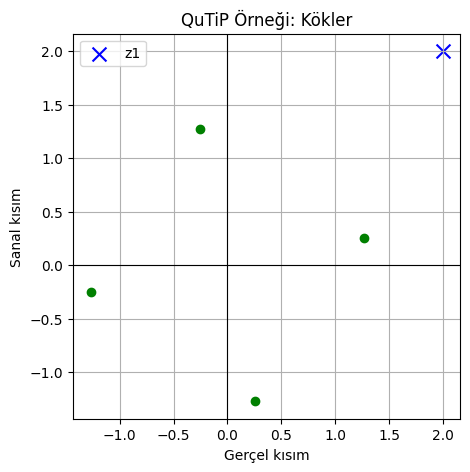

In [5]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from qutip import Qobj

z1 = 2 + 2j
z2 = -1 + 3j

# Çıkarma
print("Çıkarma (z1 - z2):", z1 - z2)

# Bölme
print("Bölme (z1 / z2):", z1 / z2)

# Eşlenik
print("Eşlenik (z1):", np.conjugate(z1))
print("|z1|^2 =", abs(z1)**2, " = z1*z̅1 =", z1*np.conjugate(z1))

# De Moivre
r = abs(z1)
theta = cmath.phase(z1)
n = 4
z_pow = r**n * (np.cos(n*theta) + 1j*np.sin(n*theta))
print(f"{z1} sayısının {n}. kuvveti:", z_pow)

# Kökler
n = 4
roots = []
for k in range(n):
    root = r**(1/n) * (np.cos((theta+2*k*np.pi)/n) + 1j*np.sin((theta+2*k*np.pi)/n))
    roots.append(root)
print(f"{z1} sayısının {n}. dereceden kökleri:", roots)

# Argand düzleminde kökler
plt.figure(figsize=(5,5))
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.scatter([z.real for z in roots], [z.imag for z in roots], color="green")
plt.scatter([z1.real], [z1.imag], color="blue", marker="x", s=100, label="z1")
plt.title("QuTiP Örneği: Kökler")
plt.xlabel("Gerçel kısım")
plt.ylabel("Sanal kısım")
plt.grid(True)
plt.legend()
plt.show()


3) Qiskit ile Örnekler

Çıkarma: (-3+0j)
Bölme: (-0.5+1.5j)
Eşlenik: (-2-1j)
|z1|^2 = 5.000000000000001  = z1*z̅1 = (5+0j)
(-2+1j) sayısının 5. kuvveti: (38+41.000000000000014j)
(-2+1j) sayısının 5. dereceden kökleri: [np.complex128(1.0101349136779156+0.5994640253010389j), np.complex128(-0.2579753126091295+1.1459399633250584j), np.complex128(-1.169572425128737+0.10876582110065522j), np.complex128(-0.46486019842507115-1.0787189890705633j), np.complex128(0.8822730224850226-0.7754508206561893j)]


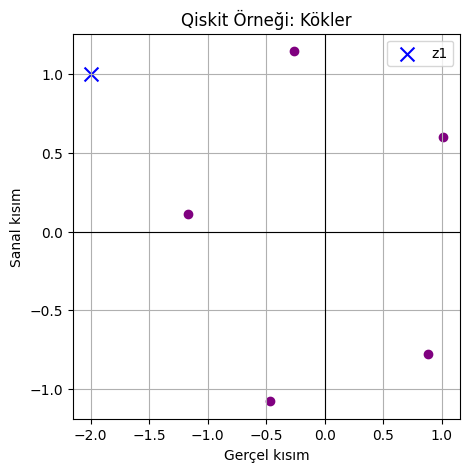

In [6]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

z1 = -2 + 1j
z2 = 1 + 1j

# Çıkarma
print("Çıkarma:", z1 - z2)

# Bölme
print("Bölme:", z1 / z2)

# Eşlenik
print("Eşlenik:", np.conjugate(z1))
print("|z1|^2 =", abs(z1)**2, " = z1*z̅1 =", z1*np.conjugate(z1))

# De Moivre
r = abs(z1)
theta = cmath.phase(z1)
n = 5
z_pow = r**n * (np.cos(n*theta) + 1j*np.sin(n*theta))
print(f"{z1} sayısının {n}. kuvveti:", z_pow)

# Kökler
n = 5
roots = []
for k in range(n):
    root = r**(1/n) * (np.cos((theta+2*k*np.pi)/n) + 1j*np.sin((theta+2*k*np.pi)/n))
    roots.append(root)
print(f"{z1} sayısının {n}. dereceden kökleri:", roots)

# Argand düzlemi
plt.figure(figsize=(5,5))
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.scatter([z.real for z in roots], [z.imag for z in roots], color="purple")
plt.scatter([z1.real], [z1.imag], color="blue", marker="x", s=100, label="z1")
plt.title("Qiskit Örneği: Kökler")
plt.xlabel("Gerçel kısım")
plt.ylabel("Sanal kısım")
plt.grid(True)
plt.legend()
plt.show()
